In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from itertools import product
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc,r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,pairwise_distances

## 1.1 Descriptive data analysis and data visualization with PCA on raw data

In [2]:
data = pd.read_csv("creditcard.csv")
data
data2=data.drop(columns=['Time'])
data2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271

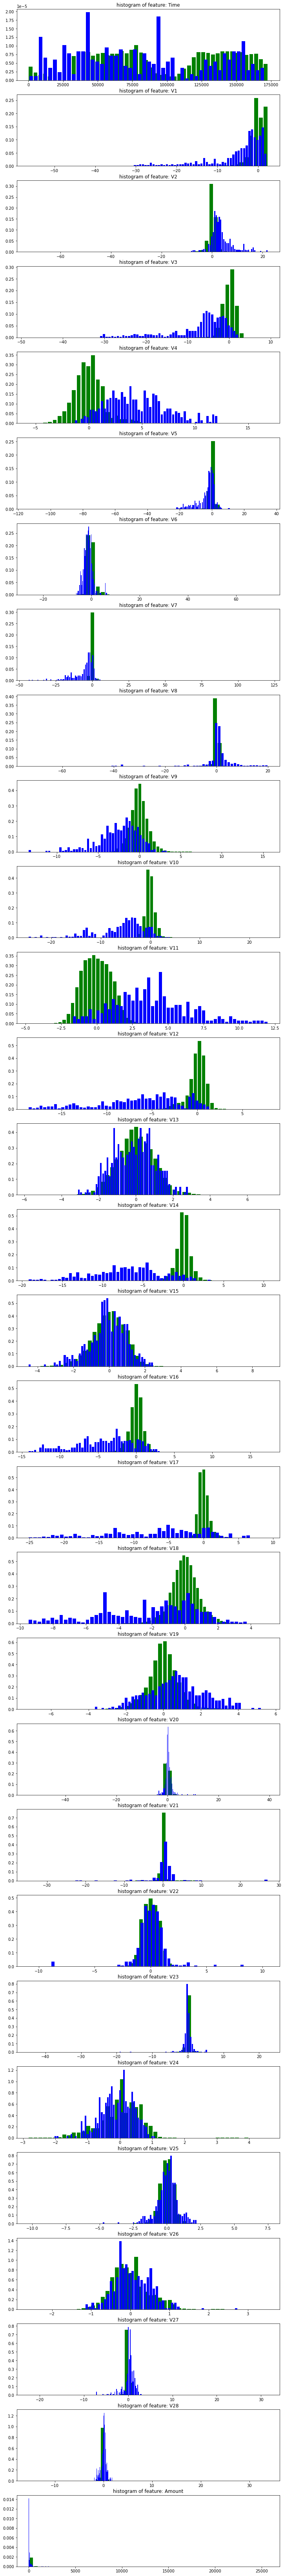

In [4]:
from matplotlib import gridspec
import seaborn as sns
# distribution of anomalous features
features = data.iloc[:,0:30].columns
plt.figure(figsize=(12,30*4))
gs = gridspec.GridSpec(30, 1)
for i, c in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    ax.hist(data[c][data.Class == 0], density=True, histtype='barstacked', rwidth=0.8,bins=50,color='g')
    ax.hist(data[c][data.Class == 1], density=True, histtype='barstacked', rwidth=0.8,bins=50,color='b')
    #sns.histplot([data[c][data.Class == 1],data[c][data.Class == 0]], bins=50,color=['r','b'])
    #sns.histplot(data[c][data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(c))
plt.show()


In [ ]:
#sns.histplot(data,x='Time', bins=50,hue='Class',kde=True,stat="density")

In [ ]:
# summary stats for each feature and label 
print(data2.shape)
print(data2.describe())

In [5]:
#fraud versus non-fraud ratio and visualzie
cases = len(data2)
nonfraud_count = len(data2[data2.Class == 0])
fraud_count = len(data2[data2.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print('--------------------------------------------')
print('Total number of cases are {}'.format(cases))
print('Number of Non-fraud cases are {}'.format(nonfraud_count))
print('Number of Non-fraud cases are {}'.format(fraud_count))
print('Percentage of fraud cases is {}'.format(fraud_percentage))
print('--------------------------------------------')

--------------------------------------------
Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of Non-fraud cases are 492
Percentage of fraud cases is 0.17
--------------------------------------------


In [6]:
# amount detail for fraud versus non-fraud
print('Amount detail for the fraud transaction')
print(data2[data2['Class'] == 1].Amount.describe())
print('--------------------------------------------')
print('Amount detail for the non-fraud transaction')
print(data2[data2['Class'] == 0].Amount.describe())

Amount detail for the fraud transaction
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
--------------------------------------------
Amount detail for the non-fraud transaction
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [7]:
#visulaize fraud-versus non-fraud with a scatter plot under 2-dimentional space
# first standardize amount column to be on the same scale as other features
data3=data2.copy()
sc = StandardScaler()
amount = data2['Amount'].values
data3['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
print(data3['Amount'].head(10))
X = data3.iloc[:, 0:29].values
y = data3.Class.values
#X

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


In [8]:
data3['Amount'].describe()

count    2.848070e+05
mean     3.202236e-16
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Histogram of Amount')

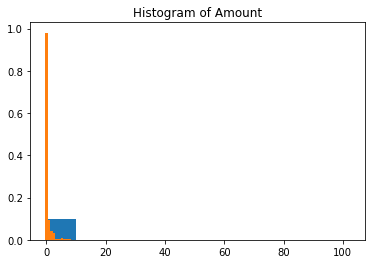

In [9]:
plt.hist(data3['Amount'][data3.Class == 0], density=True, histtype='barstacked')
plt.hist(data3['Amount'][data3.Class == 1], density=True, histtype='barstacked')
plt.title('Histogram of Amount')

In [10]:
data4=data3.copy()
data4.drop(columns=['Amount'],inplace=True)
print(data4.head())


         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28  Class  
0  0.06

In [11]:
X = data3.iloc[:, 0:28].values
y = data3.Class.values
#print(X.head())

In [ ]:
# use pca to reduce features into 2 dimentional space and visualize
#Xpca=data3.iloc[:,0:28]
#pca = PCA(n_components=2)
#pca.fit(Xpca)
#Xt = pca.transform(Xpca)
#Xt

In [12]:
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

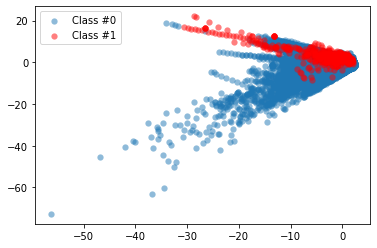

In [13]:
# Plot our data by running our plot data function on X and y
plot_data(X, y)

It seems the fraud/non-fraud cases are not well seperated. 

## 1.2 Up-sample the minority cases for more balanced dataset

In [14]:
# function to compare resampled data versus original
def compare_plot(X: np.ndarray, y: np.ndarray, X_resampled: np.ndarray, y_resampled: np.ndarray,method: str):
    #fig = plt.figure(figsize=(5, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title('Original Set')
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title(method)
    plt.legend()
    plt.show()

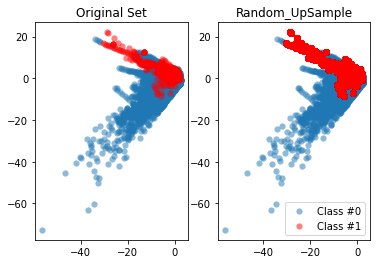

In [16]:
method = RandomOverSampler()
X_resampled, y_resampled =  method.fit_sample(X, y)
compare_plot(X, y, X_resampled, y_resampled, method='Random_UpSample')

The darker red points reflect there are more identical data for the minority classes. 

Next, try SMOTE: Synthetic minority Oversampling Technique (SMOTE)
Another way of adjusting the imbalance by oversampling minority observations
SMOTE uses characteristics of nearest neighbors of fraud cases to create new synthetic fraud cases
avoids duplicating observations. However, only works well if the minority case features are similar
Use resampling methods on the training set, not on the test set

count of fraud cases 227454
count of non-fraud cases 227454
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.06      0.94      0.12       101

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.98      0.99     56962



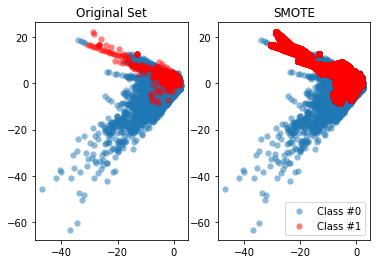

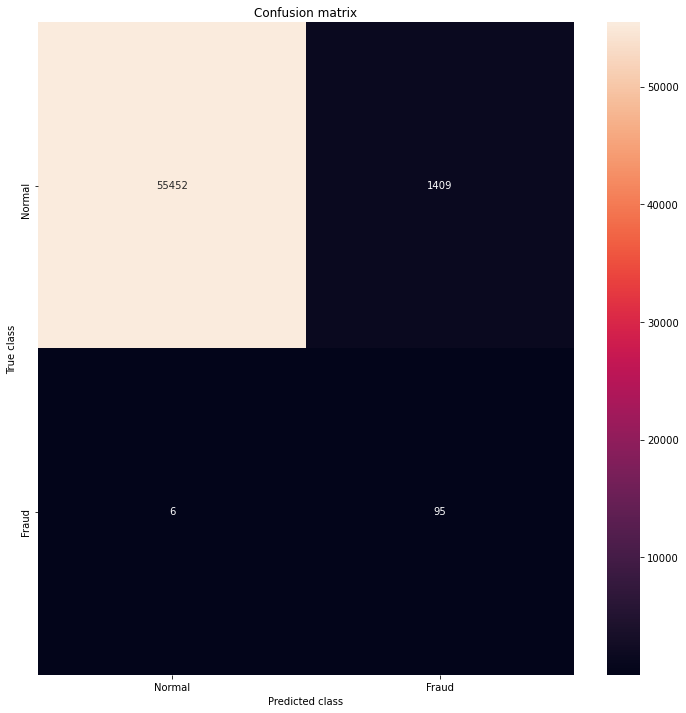

In [17]:
# Define resampling method and split into train and test
method = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Apply resampling to the training data only
X_resampled_s, y_resampled_s = method.fit_sample(X_train, y_train)
print('count of fraud cases',len(y_resampled_s[y_resampled_s == 1]))
print('count of non-fraud cases',len(y_resampled_s[y_resampled_s == 0]))

# Continue fitting the model and obtain predictions
model = LogisticRegression()
model.fit(X_resampled_s, y_resampled_s)

# Get model performance metrics
y_predicted = model.predict(X_test)
print(classification_report(y_test, y_predicted))
y_predicted
compare_plot(X_train, y_train, X_resampled_s, y_resampled_s, method='SMOTE')
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
from sklearn import preprocessing
standardized_X = preprocessing.scale(X)
standardized_X

count of fraud cases 227454
count of non-fraud cases 227454
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.07      0.93      0.12       101

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



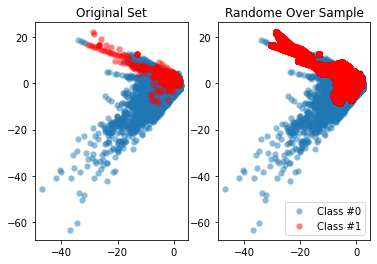

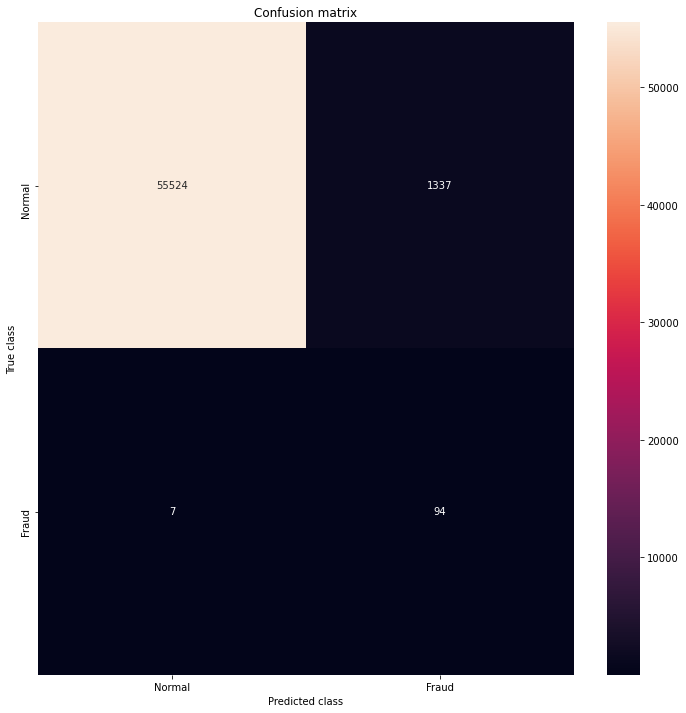

In [18]:
# Define resampling method and split into train and test
method = RandomOverSampler()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Apply resampling to the training data only
X_resampled_rand, y_resampled_rand = method.fit_sample(X_train, y_train)
print('count of fraud cases',len(y_resampled_rand[y_resampled_s == 1]))
print('count of non-fraud cases',len(y_resampled_rand[y_resampled_s == 0]))

# Continue fitting the model and obtain predictions
model = LogisticRegression()
model.fit(X_resampled_rand, y_resampled_rand)

# Get model performance metrics
y_predicted = model.predict(X_test)
print(classification_report(y_test, y_predicted))
y_predicted
compare_plot(X_train, y_train, X_resampled_s, y_resampled_s, method='Randome Over Sample')
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [19]:
from imblearn.over_sampling import ADASYN 
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SVMSMOTE 

count of fraud cases 227454
count of non-fraud cases 227454
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56861
           1       0.15      0.88      0.26       101

    accuracy                           0.99     56962
   macro avg       0.58      0.94      0.63     56962
weighted avg       1.00      0.99      0.99     56962



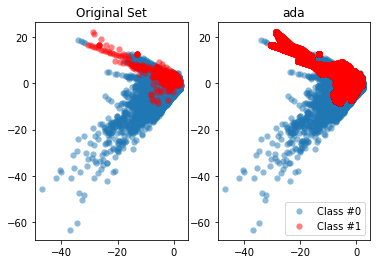

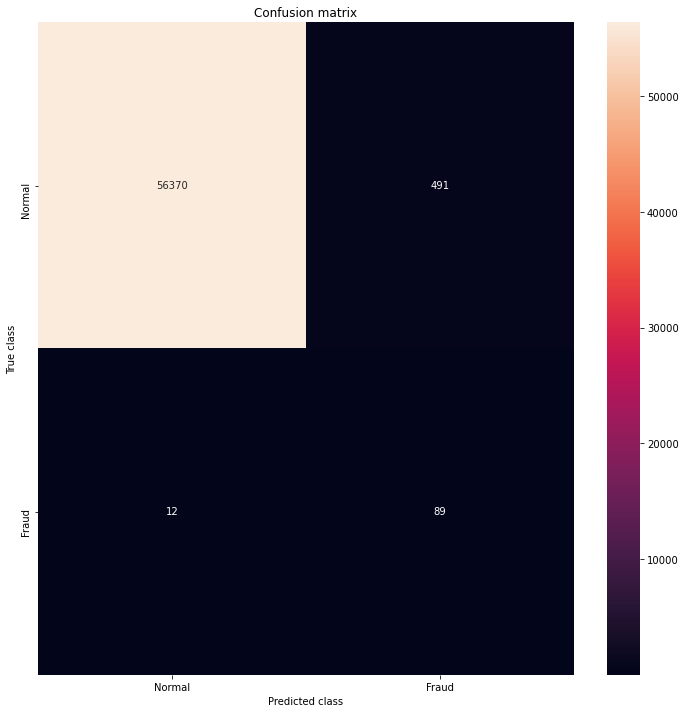

In [20]:
# Random downsample, kepp all fraud cases, while downsample non-fraud cases
ada = SVMSMOTE(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Apply resampling to the training data only
X_resampled_rand, y_resampled_rand =ada.fit_sample(X_train, y_train)
print('count of fraud cases',len(y_resampled_rand[y_resampled_rand == 1]))
print('count of non-fraud cases',len(y_resampled_rand[y_resampled_rand == 0]))

# Continue fitting the model and obtain predictions
model = LogisticRegression()
model.fit(X_resampled_rand, y_resampled_rand)

# Get model performance metrics
y_predicted = model.predict(X_test)
print(classification_report(y_test, y_predicted))
y_predicted
compare_plot(X_train, y_train, X_resampled_s, y_resampled_s, method='ada')
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
# Undersample
from imblearn.under_sampling import ClusterCentroids 
ada= ClusterCentroids(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Apply resampling to the training data only
X_resampled_rand, y_resampled_rand =ada.fit_sample(X_train, y_train)
print('count of fraud cases',len(y_resampled_rand[y_resampled_rand == 1]))
print('count of non-fraud cases',len(y_resampled_rand[y_resampled_rand == 0]))

# Continue fitting the model and obtain predictions
model = LogisticRegression()
model.fit(X_resampled_rand, y_resampled_rand)

# Get model performance metrics
y_predicted = model.predict(X_test)
print(classification_report(y_test, y_predicted))
y_predicted
compare_plot(X_train, y_train, X_resampled_rand, y_resampled_rand, method='cluster centroids down-sample')
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

count of fraud cases 227454
count of non-fraud cases 227120
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56861
           1       0.06      0.94      0.11       101

    accuracy                           0.97     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.97      0.99     56962



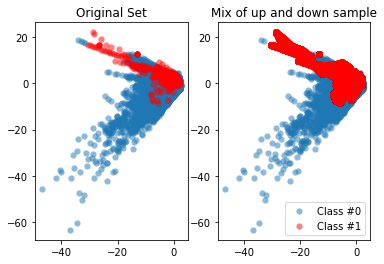

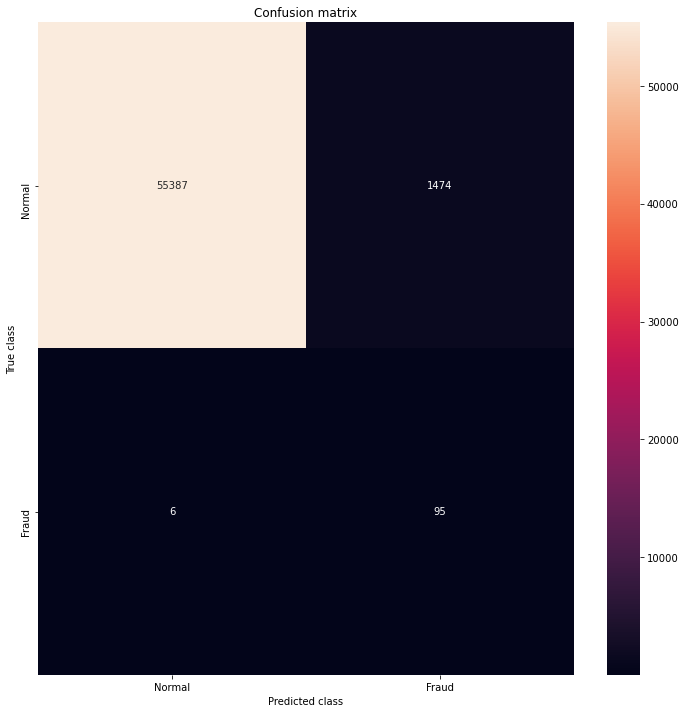

In [68]:
from imblearn.combine import SMOTEENN

ada= SMOTEENN (random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Apply resampling to the training data only
X_resampled_rand, y_resampled_rand =ada.fit_sample(X_train, y_train)
print('count of fraud cases',len(y_resampled_rand[y_resampled_rand == 1]))
print('count of non-fraud cases',len(y_resampled_rand[y_resampled_rand == 0]))

# Continue fitting the model and obtain predictions
model = LogisticRegression()
model.fit(X_resampled_rand, y_resampled_rand)

# Get model performance metrics
y_predicted = model.predict(X_test)
print(classification_report(y_test, y_predicted))
y_predicted
compare_plot(X_train, y_train, X_resampled_rand, y_resampled_rand, method='Mix of up and down sample')
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [21]:
# Random downsample, kepp all fraud cases, while downsample non-fraud cases
ada = SVMSMOTE(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Apply resampling to the training data only
X_resampled_rand, y_resampled_rand =ada.fit_sample(X_train, y_train)
print('count of fraud cases',len(y_resampled_rand[y_resampled_rand == 1]))
print('count of non-fraud cases',len(y_resampled_rand[y_resampled_rand == 0]))

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.7, learning_rate = 0.1,
                max_depth = 3, alpha = 8, n_estimators = 100)
xg_reg.fit(X_resampled_rand,y_resampled_rand)

y_predicted = xg_reg.predict(X_test)
print("the Model used is {}".format("XG Boosting"))
acc= accuracy_score(y_test,y_predicted)
print("The accuracy is  {}".format(acc))
prec= precision_score(y_test,y_predicted)
print("The precision is {}".format(prec))
rec= recall_score(y_test,y_predicted)
print("The recall is {}".format(rec))
f1= f1_score(y_test,y_predicted)
print("The F1-Score is {}".format(f1))

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Step 5: Compare y_test to predictions and obtain performance metrics (r^2 score)
print('r square',r2_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

count of fraud cases 227454
count of non-fraud cases 227454


NameError: name 'xgb' is not defined

In [ ]:
compare_plot(X_train, y_train, X_resampled_rand, y_resampled_rand, method='cluster centroids up-sample')

In [ ]:
fraud_count = len(y_resampled_s[y_resampled_s == 1])
fraud_count

In [ ]:
non_fraud_count = len(y_resampled_s[y_resampled_s == 0])
non_fraud_count

In [ ]:
X_resampled.shape
y_resampled.shape

In [ ]:
pd.value_counts(pd.Series(y))

In [ ]:
pd.value_counts(pd.Series(y_resampled))

It seems SMOTE lead to better shape of the two classes of data. Therefore, I woould choose resampled data from SMOTE to continue my further analysis.

In [ ]:
# Plot histograms of each parameter 
data4.hist(figsize = (20, 20))
plt.show()

In [ ]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [19]:
data3r=data3.sample(frac=0.2,random_state=48)
Xr = data3r.iloc[:, 0:28].values
yr = data3r.Class.values
print(data3r.shape)
print(data3r.describe())

(56961, 30)
                 V1            V2            V3            V4            V5  \
count  56961.000000  56961.000000  56961.000000  56961.000000  56961.000000   
mean      -0.008858      0.001954     -0.000766     -0.001705     -0.012145   
std        1.983710      1.665366      1.535463      1.416287      1.391006   
min      -46.855047    -60.464618    -31.103685     -5.560118    -40.427726   
25%       -0.926906     -0.603226     -0.886102     -0.847155     -0.698143   
50%        0.014510      0.064546      0.183649     -0.022024     -0.057670   
75%        1.314221      0.806526      1.030729      0.734576      0.613060   
max        2.446505     21.467203      3.934537     16.875344     34.099309   

                 V6            V7            V8            V9           V10  \
count  56961.000000  56961.000000  56961.000000  56961.000000  56961.000000   
mean      -0.001567     -0.003372     -0.001434     -0.000307     -0.000827   
std        1.332214      1.241543      

In [20]:
# Define resampling method and split into train and test
method = SMOTE()
# select only 10% of the data for this exercise
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, train_size=0.8, random_state=0)

# Apply resampling to the training data only
X_resampled_s, y_resampled_s = method.fit_sample(X_train, y_train)
print('count of fraud cases',len(y_resampled_s[y_resampled_s == 1]))
print('count of non-fraud cases',len(y_resampled_s[y_resampled_s == 0]))
print('count of fraud cases before',len(yr[yr == 1]))

count of fraud cases 45479
count of non-fraud cases 45479
count of fraud cases before 121


## Model Tunes

count of fraud cases 45479
count of non-fraud cases 45479
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11361
           1       0.71      0.84      0.77        32

    accuracy                           1.00     11393
   macro avg       0.86      0.92      0.89     11393
weighted avg       1.00      1.00      1.00     11393



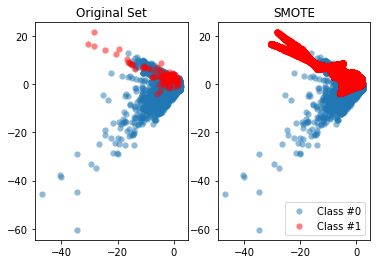

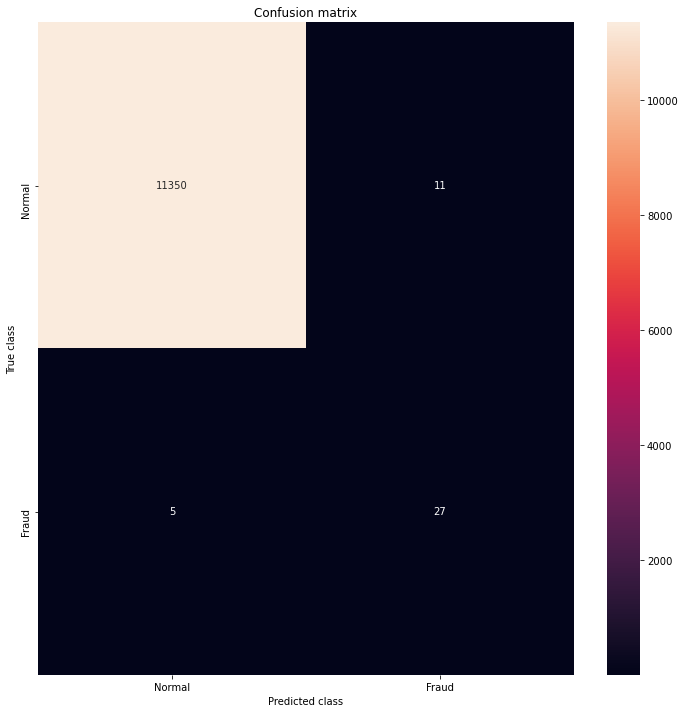

In [36]:
# Define resampling method and split into train and test
method = SMOTE()
# select only 10% of the data for this exercise
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, train_size=0.8, random_state=0)

# Apply resampling to the training data only
X_resampled_s, y_resampled_s = method.fit_sample(X_train, y_train)
print('count of fraud cases',len(y_resampled_s[y_resampled_s == 1]))
print('count of non-fraud cases',len(y_resampled_s[y_resampled_s == 0]))

# Continue fitting the model and obtain predictions
model= KNeighborsClassifier(5,p=1)
model.fit(X_resampled_s, y_resampled_s)

# Get model performance metrics
y_predicted = model.predict(X_test)
print(classification_report(y_test, y_predicted))
y_predicted
compare_plot(X_train, y_train, X_resampled_s, y_resampled_s, method='SMOTE')
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [27]:
# KNN model tuning
neighbors = list(range(1,30))
train_results = []
test_results = []
for n in neighbors:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    

In [28]:
train_results

[1.0,
 0.8764044943820224,
 0.9212823500956485,
 0.9100463950394687,
 0.9212163855845555,
 0.91562039622683,
 0.9155984080564656,
 0.9155984080564656,
 0.9155984080564656,
 0.91562039622683,
 0.9156094021416479,
 0.91562039622683,
 0.91562039622683,
 0.9100024186987401,
 0.91562039622683,
 0.9100134127839222,
 0.9100134127839222,
 0.9043954352558323,
 0.9100134127839222,
 0.9100134127839222,
 0.9100134127839222,
 0.9043954352558323,
 0.9100134127839222,
 0.9043954352558323,
 0.9043954352558323,
 0.9043954352558323,
 0.9043954352558323,
 0.9043954352558323,
 0.9043954352558323]

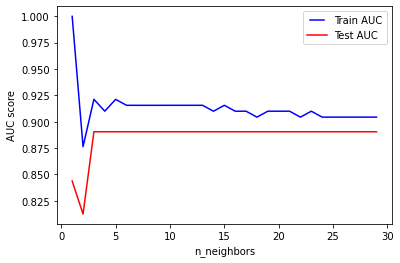

In [31]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(neighbors, train_results, "b", label="Train AUC")
line2, = plt.plot(neighbors, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel("n_neighbors")
plt.show()

In [33]:
distances = [1, 2, 3, 4, 5]
train_results = []
test_results = []
for p in distances:
    model = KNeighborsClassifier(p=p)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)



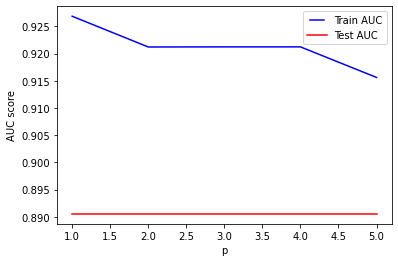

In [34]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(distances, train_results, 'b', label='Train AUC')
line2, = plt.plot(distances, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('p')
plt.show()

In [57]:
# Tune for XG boost parameters
param_test7 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05]
}
gsearch7 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=3,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(X_train,y_train)
#gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

/Users/ying_dong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/ying_dong/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:51:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0.1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=6,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_metho

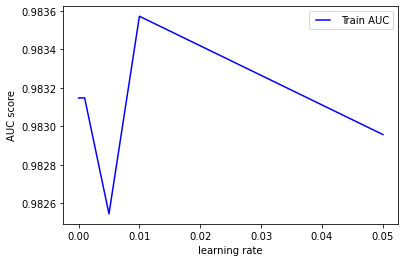

In [55]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(param_test7['reg_alpha'], gsearch7.cv_results_['mean_test_score'], 'b', label='Train AUC')
#line2, = plt.plot(param_test7, gsearch7.cv_results_['mean_test_score'], 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

In [52]:
gsearch7.cv_results_

{'mean_fit_time': array([3.51237602, 3.5332572 , 3.43175645, 3.55039635, 2.9982687 ]),
 'std_fit_time': array([0.05898279, 0.07481974, 0.03874732, 0.04363565, 0.72264288]),
 'mean_score_time': array([0.01582332, 0.01254854, 0.01341491, 0.01329393, 0.01092811]),
 'std_score_time': array([0.00255481, 0.00254787, 0.00178772, 0.0014355 , 0.001617  ]),
 'param_reg_alpha': masked_array(data=[0, 0.001, 0.005, 0.01, 0.05],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'reg_alpha': 0},
  {'reg_alpha': 0.001},
  {'reg_alpha': 0.005},
  {'reg_alpha': 0.01},
  {'reg_alpha': 0.05}],
 'split0_test_score': array([0.99963354, 0.99965797, 0.99965797, 0.99965797, 0.99963354]),
 'split1_test_score': array([0.95536194, 0.95534362, 0.95254019, 0.95788442, 0.95515428]),
 'split2_test_score': array([0.99173629, 0.99173629, 0.99132097, 0.99096062, 0.98990399]),
 'split3_test_score': array([0.9942444 , 0.9942444 , 0.99443841, 0.99459362

In [54]:
param_test7

{'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]}

In [51]:
gsearch7.cv_results_['mean_test_score']

array([0.98314728, 0.98314851, 0.98254478, 0.9835726 , 0.98295746])

count of fraud cases 22741
count of non-fraud cases 22741
[12:53:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/ying_dong/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5684
           1       0.79      0.85      0.81        13

    accuracy                           1.00      5697
   macro avg       0.89      0.92      0.91      5697
weighted avg       1.00      1.00      1.00      5697



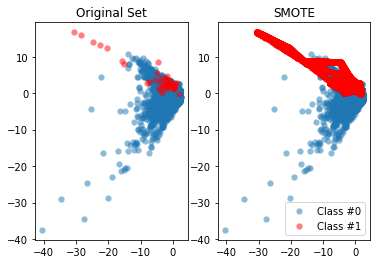

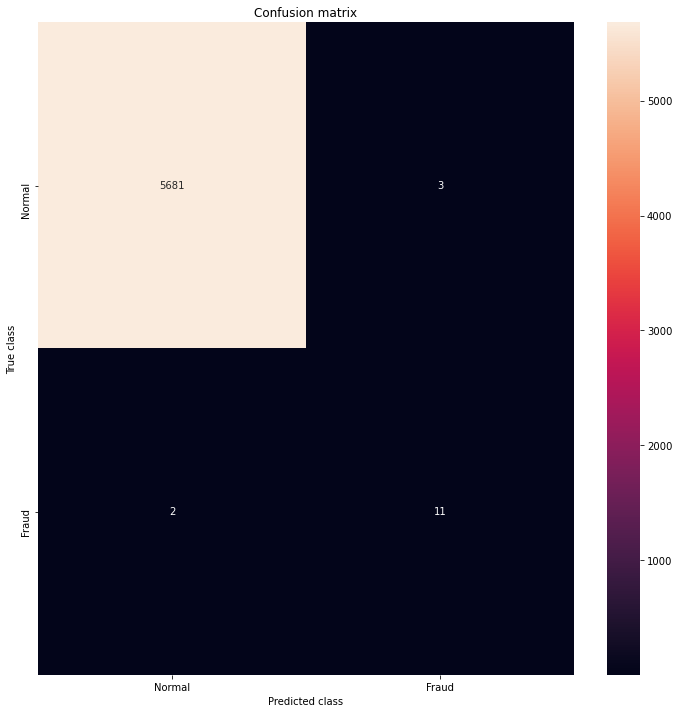

In [18]:
# Define resampling method and split into train and test
method = SMOTE()
# select only 10% of the data for this exercise
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, train_size=0.8, random_state=0)

# Apply resampling to the training data only
X_resampled_s, y_resampled_s = method.fit_sample(X_train, y_train)
print('count of fraud cases',len(y_resampled_s[y_resampled_s == 1]))
print('count of non-fraud cases',len(y_resampled_s[y_resampled_s == 0]))

# Continue fitting the model and obtain predictions
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.7, learning_rate = 0.1,
                max_depth = 3, alpha = 8, n_estimators = 100)
xg_reg.fit(X_resampled_s,y_resampled_s)

# Get model performance metrics
y_predicted = model.predict(X_test)
print(classification_report(y_test, y_predicted))
y_predicted
compare_plot(X_train, y_train, X_resampled_s, y_resampled_s, method='SMOTE')
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, train_size=0.8, random_state=0)

In [70]:
trainX=X_train
testX=X_test
trainy=y_train
testy=y_test

In [ ]:
trainX=X_train
testX=X_test
trainy=y_train
testy=y_test
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
#X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
#trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
from sklearn.svm import SVC
model = GaussianNB()
#model = SVC(kernal="rbf")
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Kernal SVC: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Kernal SVC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 2.1 Build different ML models for fraud detection

the Model used is LogisticRegression
The accuracy is  0.9991924440855307
The precision is 0.8767123287671232
The recall is 0.6336633663366337
The F1-Score is 0.7356321839080459


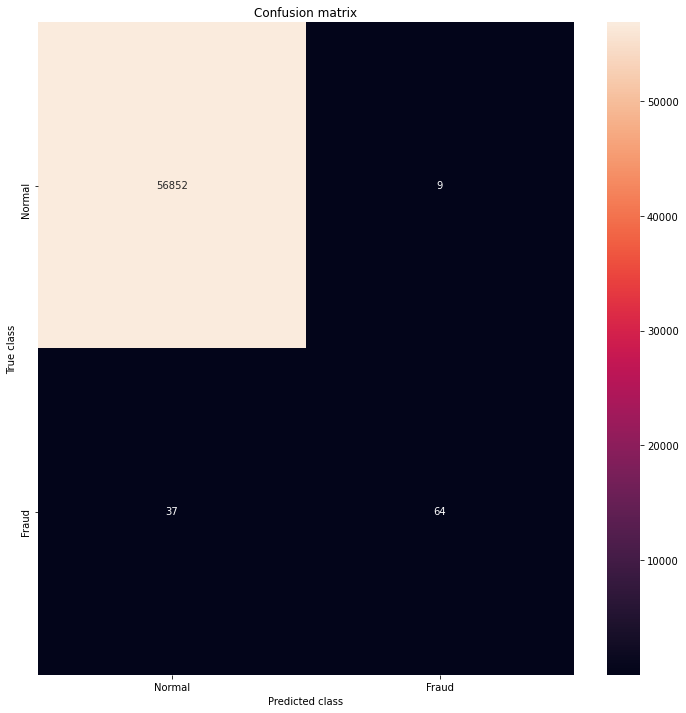

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962

r square 0.5437454651006683


In [62]:
# Define resampling method and split into train and test
method = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Apply resampling to the training data only
X_resampled, y_resampled = method.fit_sample(X_train, y_train)

# Continue fitting the model and obtain predictions
model = LogisticRegression(max_iter=200,solver='liblinear')
model.fit(X_train, y_train)
#model.fit(X_resampled, y_resampled)
# Get model performance metrics
y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
#n_outliers = len(Fraud)
print("the Model used is {}".format("LogisticRegression"))
acc= accuracy_score(y_test,y_predicted)
print("The accuracy is  {}".format(acc))
prec= precision_score(y_test,y_predicted)
print("The precision is {}".format(prec))
rec= recall_score(y_test,y_predicted)
print("The recall is {}".format(rec))
f1= f1_score(y_test,y_predicted)
print("The F1-Score is {}".format(f1))

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


print(classification_report(y_test, y_predicted))
print('r square',r2_score(y_test, y_predicted))

In [ ]:
y_predicted

In [ ]:
# roc curve for logistic regression
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for logistic regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
from sklearn.svm import SVC

No Skill: ROC AUC=0.500
Naice Bayes: ROC AUC=0.987


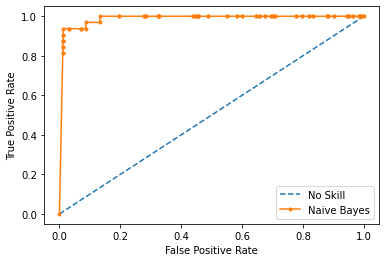

In [78]:
trainX=X_train
testX=X_test
trainy=y_train
testy=y_test
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
#X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
#trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
#model = SVC(kernel='linear')
model=GaussianNB()
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naice Bayes: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# train logistic regression with imbalanced data
model = LogisticRegression(max_iter=200,solver='liblinear')
#model.fit(X_train, y_train)
model.fit(X_resampled, y_resampled)

# Get model performance metrics
y_predicted = model.predict(X_test)


print("the Model used is {}".format("LogisticRegression with Resampled"))
acc= accuracy_score(y_test,y_predicted)
print("The accuracy is  {}".format(acc))
prec= precision_score(y_test,y_predicted)
print("The precision is {}".format(prec))
rec= recall_score(y_test,y_predicted)
print("The recall is {}".format(rec))
f1= f1_score(y_test,y_predicted)
print("The F1-Score is {}".format(f1))

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(y_test, predicted))
print('r square',r2_score(y_test, y_predicted))

In [ ]:
# KNN
modelKNN = KNeighborsClassifier(5)
# Step 3: Fit the model to the training data
modelKNN.fit(X_train, y_train)
# Step 4: Obtain model predictions from the test data
y_predicted = modelKNN.predict(X_test)

print("the Model used is {}".format("KNN"))
acc= accuracy_score(y_test,y_predicted)
print("The accuracy is  {}".format(acc))
prec= precision_score(y_test,y_predicted)
print("The precision is {}".format(prec))
rec= recall_score(y_test,y_predicted)
print("The recall is {}".format(rec))
f1= f1_score(y_test,y_predicted)
print("The F1-Score is {}".format(f1))

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Step 5: Compare y_test to predictions and obtain performance metrics (r^2 score)
print('r square',r2_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = modelKNN.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# linear svm
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
# Step 4: Obtain model predictions from the test data
y_predicted = svclassifier.predict(X_test)

print("the Model used is {}".format("Linear SVM"))
acc= accuracy_score(y_test,y_predicted)
print("The accuracy is  {}".format(acc))
prec= precision_score(y_test,y_predicted)
print("The precision is {}".format(prec))
rec= recall_score(y_test,y_predicted)
print("The recall is {}".format(rec))
f1= f1_score(y_test,y_predicted)
print("The F1-Score is {}".format(f1))

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()



# Step 5: Compare y_test to predictions and obtain performance metrics (r^2 score)
print('r square',r2_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = svclassifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# kernalized svm
from sklearn.svm import SVC

# find bandwidth- randomly select 1000 samples
np.random.seed(0)
idx = np.random.choice(X_train.shape[0], size=1000,replace=False)
pairs_gamma=X_train[idx,:]
dis=pairwise_distances(pairs_gamma)
df_dis_median=np.median(dis)
#df_dis_median
sigma=np.sqrt(df_dis_median**2/2)
#sigma
#transform sigmma to gamma
gamma2=1/(2*sigma**2)
gamma2


svclassifier = SVC(kernel='rbf',gamma=gamma2)
svclassifier.fit(X_train, y_train)
# Step 4: Obtain model predictions from the test data
y_predicted = svclassifier.predict(X_test)


print("the Model used is {}".format("Kernal SVM"))
acc= accuracy_score(y_test,y_predicted)
print("The accuracy is  {}".format(acc))
prec= precision_score(y_test,y_predicted)
print("The precision is {}".format(prec))
rec= recall_score(y_test,y_predicted)
print("The recall is {}".format(rec))
f1= f1_score(y_test,y_predicted)
print("The F1-Score is {}".format(f1))

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Step 5: Compare y_test to predictions and obtain performance metrics (r^2 score)
print('r square',r2_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = svclassifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(20,10),max_iter=500)
mlp.fit(X_train, y_train)
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
y_predicted = mlp.predict(X_test)

print("the Model used is {}".format("Neural Network"))
acc= accuracy_score(y_test,y_predicted)
print("The accuracy is  {}".format(acc))
prec= precision_score(y_test,y_predicted)
print("The precision is {}".format(prec))
rec= recall_score(y_test,y_predicted)
print("The recall is {}".format(rec))
f1= f1_score(y_test,y_predicted)
print("The F1-Score is {}".format(f1))

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_predicted))
print(classification_report(y_test,y_predicted))

In [ ]:
print(confusion_matrix(y_test,y_predicted))
print(classification_report(y_test,y_predicted))

In [ ]:
# Naive Bayes
clf = GaussianNB().fit(X_train, y_train)
# test error
y_predicted = clf.predict(X_test)

print("the Model used is {}".format("Naive Bays"))
acc= accuracy_score(y_test,y_predicted)
print("The accuracy is  {}".format(acc))
prec= precision_score(y_test,y_predicted)
print("The precision is {}".format(prec))
rec= recall_score(y_test,y_predicted)
print("The recall is {}".format(rec))
f1= f1_score(y_test,y_predicted)
print("The F1-Score is {}".format(f1))

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Step 5: Compare y_test to predictions and obtain performance metrics (r^2 score)
print('r square',r2_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

In [ ]:
y_predicted

In [ ]:
# decision tree
# define the tree model and set hyperparameters
from sklearn.tree import plot_tree
dt = DecisionTreeClassifier(criterion='entropy',
                            max_depth=3,
                            min_samples_leaf=100)
# fit decision tree with data
dt.fit(X_train, y_train)

# plot the classfier
plt.figure(figsize=(26,13))
plot_tree(dt);

y_predicted =dt.predict(X_test)

print("the Model used is {}".format("Decision Trees"))
acc= accuracy_score(y_test,y_predicted)
print("The accuracy is  {}".format(acc))
prec= precision_score(y_test,y_predicted)
print("The precision is {}".format(prec))
rec= recall_score(y_test,y_predicted)
print("The recall is {}".format(rec))
f1= f1_score(y_test,y_predicted)
print("The F1-Score is {}".format(f1))

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Step 5: Compare y_test to predictions and obtain performance metrics (r^2 score)
print('r square',r2_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

In [ ]:
# random forest
rf = RandomForestClassifier(max_depth=3,min_samples_leaf=100)
rf.fit(X_train, y_train)
y_predicted =rf.predict(X_test)

print("the Model used is {}".format("Random Forest"))
acc= accuracy_score(y_test,y_predicted)
print("The accuracy is  {}".format(acc))
prec= precision_score(y_test,y_predicted)
print("The precision is {}".format(prec))
rec= recall_score(y_test,y_predicted)
print("The recall is {}".format(rec))
f1= f1_score(y_test,y_predicted)
print("The F1-Score is {}".format(f1))

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Step 5: Compare y_test to predictions and obtain performance metrics (r^2 score)
print('r square',r2_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))


In [38]:
import xgboost as xgb

In [ ]:
#data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.7, learning_rate = 0.1,
                max_depth = 3, alpha = 8, n_estimators = 100)
xg_reg.fit(X_train,y_train)

y_predicted = xg_reg.predict(X_test)
print("the Model used is {}".format("XG Boosting"))
acc= accuracy_score(y_test,y_predicted)
print("The accuracy is  {}".format(acc))
prec= precision_score(y_test,y_predicted)
print("The precision is {}".format(prec))
rec= recall_score(y_test,y_predicted)
print("The recall is {}".format(rec))
f1= f1_score(y_test,y_predicted)
print("The F1-Score is {}".format(f1))

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Step 5: Compare y_test to predictions and obtain performance metrics (r^2 score)
print('r square',r2_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()